In [49]:
import torch
import torch.nn as nn
import numpy as np
from models import LRNet_CIFAR10_ver2_not_sample
import matplotlib.pyplot as plt
from layers import LRnetConv2d, LRnet_sign_probX

In [42]:
in_chan = 3
out_chan = 128
gain = False
tau = 1.0

class testnet(nn.Module):
    def __init__(self):
        super(testnet, self).__init__()
                
        self.exit1 = False
        self.exit2 = False
        self.exit3 = False
        self.exit4 = False
        self.exit5 = False
        self.exit6 = False
        
        self.conv1 = LRnetConv2d(in_chan, out_chan, 3, stride=1, padding=1, output_gain=gain, output_sample=False)        
        self.sign1 = LRnet_sign_probX(out_chan, tau=tau, output_sample=True)
        self.conv1.test_forward = False
        self.sign1.test_forward = False
        
        self.conv2 = LRnetConv2d(128, 128, 3, stride=2, padding=1, output_gain=gain, output_sample=False)        
        self.sign2 = LRnet_sign_probX(128, tau=tau, output_sample=True)
        self.conv2.test_forward = False
        self.sign2.test_forward = False
        
        self.conv3 = LRnetConv2d(128, 256, 3, stride=1, padding=1, output_gain=gain, output_sample=False)        
        self.sign3 = LRnet_sign_probX(256, tau=tau, output_sample=True)
        self.conv3.test_forward = False
        self.sign3.test_forward = False
        
        self.conv4 = LRnetConv2d(256, 256, 3, stride=2, padding=1, output_gain=gain, output_sample=False)        
        self.sign4 = LRnet_sign_probX(256, tau=tau, output_sample=True)
        self.conv4.test_forward = False
        self.sign4.test_forward = False   
        
        self.conv5 = LRnetConv2d(256, 512, 3, stride=1, padding=1, output_gain=gain, output_sample=False)        
        self.sign5 = LRnet_sign_probX(512, tau=tau, output_sample=True)
        self.conv5.test_forward = False
        self.sign5.test_forward = False
        
        self.conv6 = LRnetConv2d(512, 512, 3, stride=2, padding=1, output_gain=gain, output_sample=False)        
        self.sign6 = LRnet_sign_probX(512, tau=tau, output_sample=True)
        self.conv6.test_forward = False
        self.sign6.test_forward = False            
        
    def forward(self,input, sample=False, test_forward=False):
        self.conv1.output_sample = False
        self.sign1.output_sample = True
        self.conv1.test_forward = test_forward
        self.sign1.test_forward = test_forward

        self.conv2.output_sample = False
        self.sign2.output_sample = True
        self.conv2.test_forward = test_forward
        self.sign2.test_forward = test_forward

        self.conv3.output_sample = False
        self.sign3.output_sample = True
        self.conv3.test_forward = test_forward
        self.sign3.test_forward = test_forward

        self.conv4.output_sample = False
        self.sign4.output_sample = True
        self.conv4.test_forward = test_forward
        self.sign4.test_forward = test_forward

        self.conv5.output_sample = False
        self.sign5.output_sample = True
        self.conv5.test_forward = test_forward
        self.sign5.test_forward = test_forward
        
        self.conv6.output_sample = False
        self.sign6.output_sample = True
        self.conv6.test_forward = test_forward
        self.sign6.test_forward = test_forward
        
        x = self.conv1(input)
        x1 = self.sign1(x)
        if self.exit1:
            if test_forward:
                return x1
            else:
                return x1, x
            
        x = self.conv2(x1)
        x2 = self.sign2(x)
        if self.exit2:        
            if test_forward:
                return x2
            else:
                return x2, x   
            
        x = self.conv3(x2)
        x3 = self.sign3(x)
        if self.exit3:        
            if test_forward:
                return x3
            else:
                return x3, x   
            
        x = self.conv4(x3)
        x4 = self.sign4(x)
        if self.exit4:        
            if test_forward:
                return x4
            else:
                return x4, x   
            
        x = self.conv5(x4)
        x5 = self.sign5(x)
        if self.exit5:        
            if test_forward:
                return x5
            else:
                return x5, x        
        
        x = self.conv6(x5)
        x6 = self.sign6(x)        
        if self.exit6:        
            if test_forward:
                return x6
            else:
                return x6, x
            
    def update_last_layer(self, n):
        self.exit1 = False
        self.exit2 = False
        self.exit3 = False
        self.exit4 = False
        self.exit5 = False
        self.exit6 = False
        net.sign1.collect_stats = False            
        net.sign2.collect_stats = False                    
        net.sign3.collect_stats = False                    
        net.sign4.collect_stats = False                    
        net.sign5.collect_stats = False                    
        net.sign6.collect_stats = False                            
        
        if (n == 1):    
            self.exit1 = True  
            net.sign1.collect_stats=True            
        if (n == 2):    
            self.exit2 = True  
            net.sign2.collect_stats=True                        
        if (n == 3):    
            self.exit3 = True  
            net.sign3.collect_stats=True                        
        if (n == 4):    
            self.exit4 = True  
            net.sign4.collect_stats=True                        
        if (n == 5):    
            self.exit5 = True  
            net.sign5.collect_stats=True                        
        if (n == 6):    
            self.exit6 = True          
            net.sign6.collect_stats=True            

    def update_tau(self, tau, hard):
        net.sign1.tau = tau            
        net.sign2.tau = tau                    
        net.sign3.tau = tau                    
        net.sign4.tau = tau                    
        net.sign5.tau = tau                    
        net.sign6.tau = tau  
        
        net.sign1.hard = hard            
        net.sign2.hard = hard                    
        net.sign3.hard = hard                    
        net.sign4.hard = hard                    
        net.sign5.hard = hard                    
        net.sign6.hard = hard  
        
    def train_mode_switch(self):
        self.conv1.train_mode_switch()
        self.conv2.train_mode_switch()
        self.conv3.train_mode_switch()
        self.conv4.train_mode_switch()
        self.conv5.train_mode_switch()
        self.conv6.train_mode_switch()
        self.sign1.train_mode_switch()
        self.sign2.train_mode_switch()
        self.sign3.train_mode_switch()
        self.sign4.train_mode_switch()
        self.sign5.train_mode_switch()
        self.sign6.train_mode_switch()       
        
    def test_mode_switch(self, options=1, tickets=1):
        self.conv1.test_mode_switch(options, tickets)
        self.conv2.test_mode_switch(options, tickets)
        self.conv3.test_mode_switch(options, tickets)
        self.conv4.test_mode_switch(options, tickets)
        self.conv5.test_mode_switch(options, tickets)
        self.conv6.test_mode_switch(options, tickets)
        self.sign1.test_mode_switch(options, tickets)    
        self.sign2.test_mode_switch(options, tickets)
        self.sign3.test_mode_switch(options, tickets)
        self.sign4.test_mode_switch(options, tickets)
        self.sign5.test_mode_switch(options, tickets)
        self.sign6.test_mode_switch(options, tickets)
        

In [43]:
# ########################
# Preparing a real input
# ########################

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms

batch = 2

train_kwargs = {'batch_size': batch}
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(
    root='../data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, **train_kwargs)

rand_num = np.random.randint(100)
for batch_idx, (inputs, targets) in enumerate(trainloader):
    if batch_idx == rand_num:
        print(batch_idx)
        real_x = inputs
        break
print("input size is:", real_x.size())

Files already downloaded and verified
88
input size is: torch.Size([2, 3, 32, 32])


In [44]:
net = testnet()

In [ ]:

# => SKIP this stage for random weights

# ########################
# Initializing the Model
# ########################

class args:
    def __init__(self):
        self.cifar100 = False
args = args()        
test_model = LRNet_CIFAR10_ver2_not_sample(writer=None, args=args).cpu()
test_model.load_state_dict(torch.load('saved_models/cifar10_yes_gumbel_yes_bn_train_yes_freeze_fc1_lr_0_02_200trials_11_01_cpu.pt'))

state_dict = test_model.state_dict()
with torch.no_grad():
    net.conv1.alpha.copy_(state_dict['conv1.alpha'])
    net.conv1.betta.copy_(state_dict['conv1.betta'])
    net.conv1.bias.copy_(state_dict['conv1.bias'])  
    
    net.conv2.alpha.copy_(state_dict['conv2.alpha'])
    net.conv2.betta.copy_(state_dict['conv2.betta'])
    net.conv2.bias.copy_(state_dict['conv2.bias'])     
    
    net.conv3.alpha.copy_(state_dict['conv3.alpha'])
    net.conv3.betta.copy_(state_dict['conv3.betta'])
    net.conv3.bias.copy_(state_dict['conv3.bias'])   
    
    net.conv4.alpha.copy_(state_dict['conv4.alpha'])
    net.conv4.betta.copy_(state_dict['conv4.betta'])
    net.conv4.bias.copy_(state_dict['conv4.bias'])      
    
    net.conv5.alpha.copy_(state_dict['conv5.alpha'])
    net.conv5.betta.copy_(state_dict['conv5.betta'])
    net.conv5.bias.copy_(state_dict['conv5.bias'])   
    
    net.conv6.alpha.copy_(state_dict['conv6.alpha'])
    net.conv6.betta.copy_(state_dict['conv6.betta'])
    net.conv6.bias.copy_(state_dict['conv6.bias'])      
    
net.cuda()        

mean entropy is:  0.6606011390686035


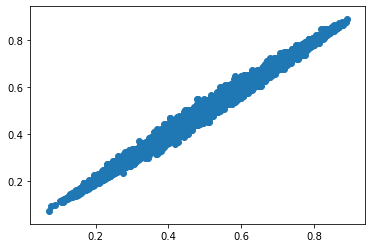

In [45]:
# ######################################
# Compare cont output to discrete output
# ######################################

N = 10000

net.update_tau(tau=1.0, hard=True) # <= choose tau and hard/soft for Gumbel_softmax
net.update_last_layer(1) # <= choose how much layers: [1,6]

net_input = real_x # real_x # x
net_input = net_input.cuda()

net.train_mode_switch()
res = net(net_input) 

Q, W = res
y, p = Q
m, v = W

# ######################################
# Calc P according to Cont Model
# ######################################
for i in range(0,N):
    net.train_mode_switch()
    res = net(net_input) 
    Q, W = res
    y, p1 = Q 
    is_p1 = (y == 1) * (1)
    is_m1 = (y == -1) * (1)   
    if i == 0:    
        is_p1_cntr = is_p1
        is_m1_cntr = is_m1
    else:
        is_p1_cntr += is_p1
        is_m1_cntr += is_m1  
            
train_is_p1_vec = is_p1_cntr/N
trainis_m1_vec = is_m1_cntr/N

# ######################################
# Calc P according to Discrete Model
# ######################################
net.test_mode_switch(1, 1)
for i in range(0,N):
    net.conv1.test_mode_switch(1,1)
    net.conv2.test_mode_switch(1,1)
    net.conv3.test_mode_switch(1,1)
    net.conv4.test_mode_switch(1,1)
    net.conv5.test_mode_switch(1,1)
    net.conv6.test_mode_switch(1,1)    
    y1 = net(net_input,test_forward=True)
    is_p1 = (y1 == 1) * (1)
    is_m1 = (y1 == -1) * (1)    
    if i == 0:    
        is_p1_cntr = is_p1
        is_m1_cntr = is_m1
    else:
        is_p1_cntr += is_p1
        is_m1_cntr += is_m1  

test_is_p1_vec = is_p1_cntr/N
test_is_m1_vec = is_m1_cntr/N

p2 = 1 - p
entropy = (-1) * ((p * torch.log(p + 1e-30)) + (p2 * torch.log(p2 + 1e-30)))
print("mean entropy is: ", torch.mean(entropy).item())

x = train_is_p1_vec
y = test_is_p1_vec
xx = x.data.cpu().numpy().reshape(-1,torch.numel(x))
yy = y.data.cpu().numpy().reshape(-1,torch.numel(y))
plt.scatter(xx, yy)
